In [228]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
%matplotlib inline

csc = pd.read_excel('clinical data.xlsx', sheet_name = 'CSC Data')  # reads the excel file and saves the csc data sheet into a dataframe
clinical = pd.read_excel('clinical data.xlsx', sheet_name = 'Clinical Data') # reads the excel file and saves the clinical data sheet into a dataframe

Text(0.5, 1.0, 'CSC Data')

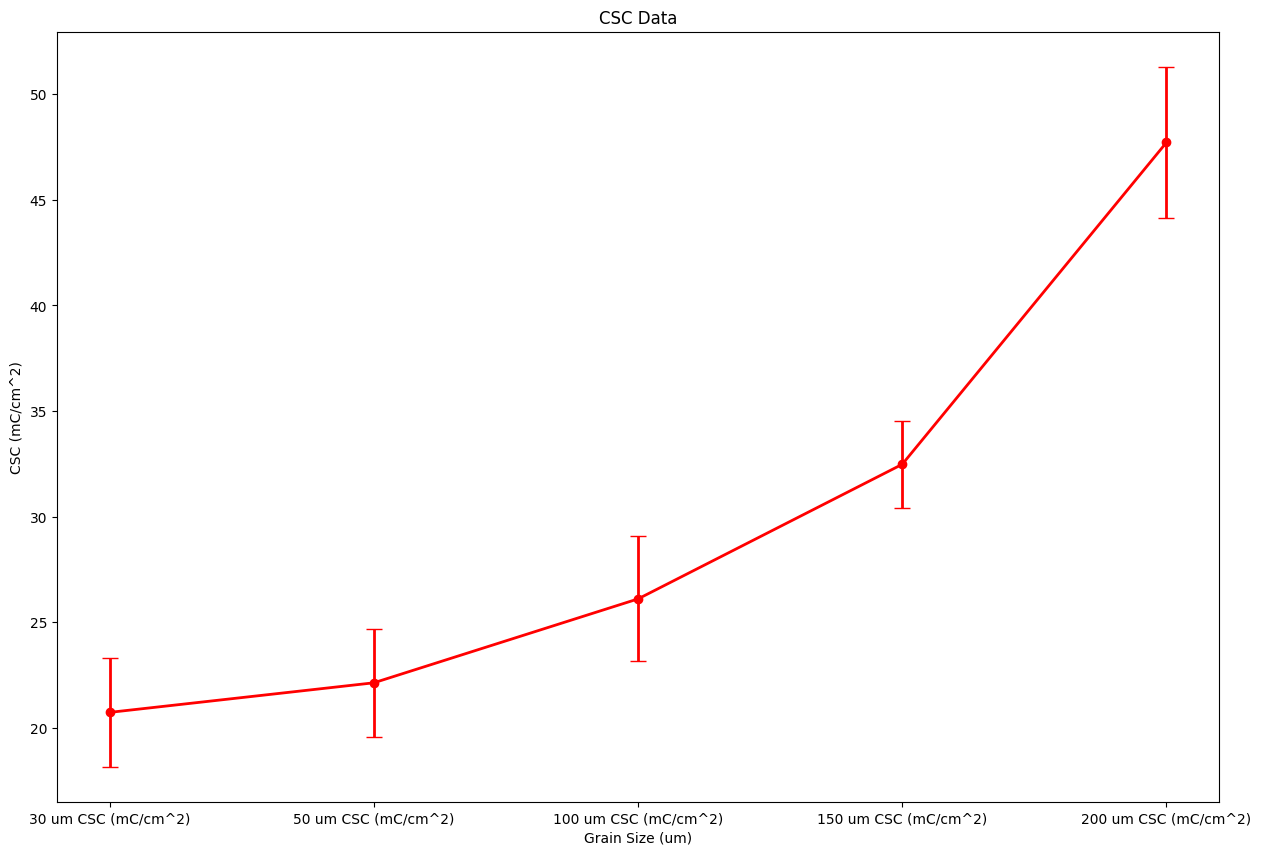

In [229]:
plt.figure (figsize=(15,10))
plt.errorbar(csc.columns, csc.mean(), yerr = csc.std(), fmt = 'ro-', linewidth = 2, capsize = 6)    # plots the device on the x-axis and the means on the y-axis with error bars of std deviation
plt.xlabel('Grain Size (um)')
plt.ylabel('CSC (mC/cm^2)')
plt.title('CSC Data')

array([[<Axes: title={'center': '30 um CSC (mC/cm^2)'}>,
        <Axes: title={'center': '50 um CSC (mC/cm^2)'}>],
       [<Axes: title={'center': '100 um CSC (mC/cm^2)'}>,
        <Axes: title={'center': '150 um CSC (mC/cm^2)'}>],
       [<Axes: title={'center': '200 um CSC (mC/cm^2)'}>, <Axes: >]],
      dtype=object)

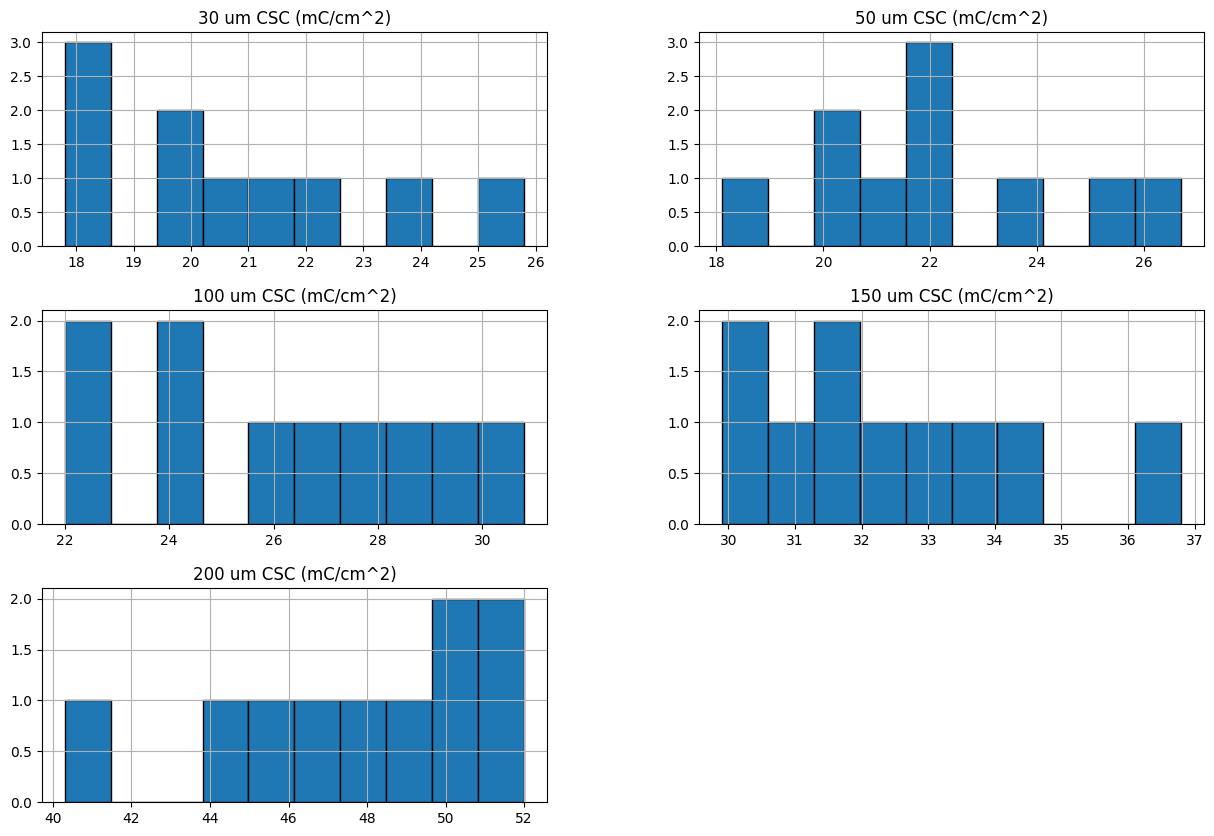

In [230]:
#Normality of CSC Data
csc.hist(figsize = (15,10), ec = 'black')   # plots a histogram of all the data in csc dataframe

In [231]:
# Shapiro test used as a measure of normality
# If p-value < than 0.05 data is likely not normally distributed

print('Shapiro Tests:\n')
print('30 um results:',stats.shapiro(csc['30 um CSC (mC/cm^2)']))
print('50 um results:',stats.shapiro(csc['50 um CSC (mC/cm^2)']))
print('100 um results:',stats.shapiro(csc['100 um CSC (mC/cm^2)']))
print('150 um results:',stats.shapiro(csc['150 um CSC (mC/cm^2)']))
print('200 um results:',stats.shapiro(csc['200 um CSC (mC/cm^2)']))

Shapiro Tests:

30 um results: ShapiroResult(statistic=np.float64(0.9328032026562041), pvalue=np.float64(0.476024092422507))
50 um results: ShapiroResult(statistic=np.float64(0.9760439838911069), pvalue=np.float64(0.9405473935027514))
100 um results: ShapiroResult(statistic=np.float64(0.9655971797048837), pvalue=np.float64(0.8472958347825618))
150 um results: ShapiroResult(statistic=np.float64(0.9451249190117598), pvalue=np.float64(0.6113102692071415))
200 um results: ShapiroResult(statistic=np.float64(0.9362101152731511), pvalue=np.float64(0.5116626187473816))


In [232]:
# Because our data is normally distributed we can use an ANOVA
# oneway ANOVA comparing all devices by calling the column names

stats.f_oneway(csc['30 um CSC (mC/cm^2)'],
              csc['50 um CSC (mC/cm^2)'],
              csc['100 um CSC (mC/cm^2)'],
              csc['150 um CSC (mC/cm^2)'],
              csc['200 um CSC (mC/cm^2)'])

F_onewayResult(statistic=np.float64(154.68559817778555), pvalue=np.float64(1.1071633494384008e-25))

In [233]:
# As the ANOVA tells us there is a significant difference we must perform post-hoc tests to confirm where this is
# Use Bonferroni correction as it is the most conservative, data is indpendent so we use an independent t-test

print('Corrected alpha: ', 0.05/5)

print('30 to 50 um:', stats.ttest_ind(csc['30 um CSC (mC/cm^2)'],csc['50 um CSC (mC/cm^2)']))   # compares different values to each other via t-test, calling from column name
print('30 to 100 um:', stats.ttest_ind(csc['30 um CSC (mC/cm^2)'],csc['100 um CSC (mC/cm^2)']))
print('50 to 100 um:', stats.ttest_ind(csc['50 um CSC (mC/cm^2)'],csc['100 um CSC (mC/cm^2)']))
print('100 to 150 um:', stats.ttest_ind(csc['100 um CSC (mC/cm^2)'],csc['150 um CSC (mC/cm^2)']))
print('150 to 200 um:', stats.ttest_ind(csc['150 um CSC (mC/cm^2)'],csc['200 um CSC (mC/cm^2)']))

Corrected alpha:  0.01
30 to 50 um: TtestResult(statistic=np.float64(-1.220146858077532), pvalue=np.float64(0.23815446827589085), df=np.float64(18.0))
30 to 100 um: TtestResult(statistic=np.float64(-4.335205691273846), pvalue=np.float64(0.00039874090748587927), df=np.float64(18.0))
50 to 100 um: TtestResult(statistic=np.float64(-3.2115027875604283), pvalue=np.float64(0.004838547495565711), df=np.float64(18.0))
100 to 150 um: TtestResult(statistic=np.float64(-5.597274462202518), pvalue=np.float64(2.597690403472827e-05), df=np.float64(18.0))
150 to 200 um: TtestResult(statistic=np.float64(-11.653299469182894), pvalue=np.float64(8.078442433116009e-10), df=np.float64(18.0))


All devices are significantly different to each other except 30um to 50um (all reject null hypothesis except 30 to 50)

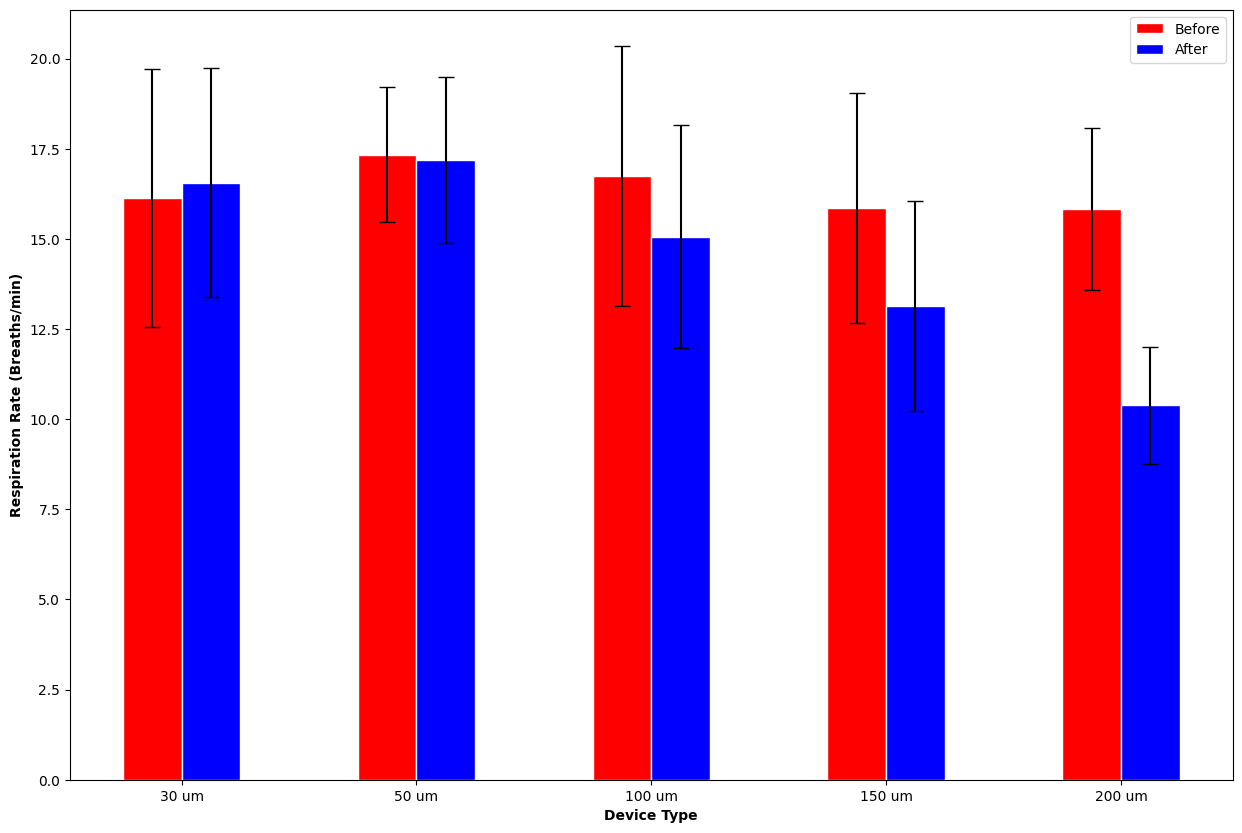

In [234]:
clinical_mean_before = [clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '30 um'].mean(), 
                        clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '50 um'].mean(),
                        clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '100 um'].mean(), 
                        clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '150 um'].mean(), 
                        clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '200 um'].mean(), ] # takes the mean values for RR before stim across each device type, indicate which values by identifying the column to look in and then for device type where value == specified

clinical_std_before = [clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '30 um'].std(), 
                        clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '50 um'].std(),
                        clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '100 um'].std(), 
                        clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '150 um'].std(), 
                        clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '200 um'].std(), ]

clinical_mean_after = [clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '30 um'].mean(), 
                        clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '50 um'].mean(),
                        clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '100 um'].mean(), 
                        clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '150 um'].mean(), 
                        clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '200 um'].mean(), ]

clinical_std_after = [clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '30 um'].std(), 
                        clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '50 um'].std(),
                        clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '100 um'].std(), 
                        clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '150 um'].std(), 
                        clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '200 um'].std(), ]

# Data
barWidth = 0.25

# Bar positions
r = np.arange(len(clinical_mean_before))    # finds the array and sets the origin of our bar to that value
r2 = r + barWidth
rmid = (r + r2) / 2

# Plotting
plt.figure(figsize = (15,10))
plt.bar(r, clinical_mean_before, yerr = clinical_std_before, color='red', width=barWidth, edgecolor='white', label='Before', capsize = 6)    # plots bar chart with error bars
plt.bar(r2, clinical_mean_after, yerr = clinical_std_after, color='blue', width=barWidth, edgecolor='white', label='After', capsize = 6)

# Xticks
plt.xlabel('Device Type', fontweight='bold')
plt.xticks(rmid, ['30 um', '50 um', '100 um', '150 um', '200 um'])
plt.ylabel('Respiration Rate (Breaths/min)', fontweight='bold')

# Legend and show
plt.legend()

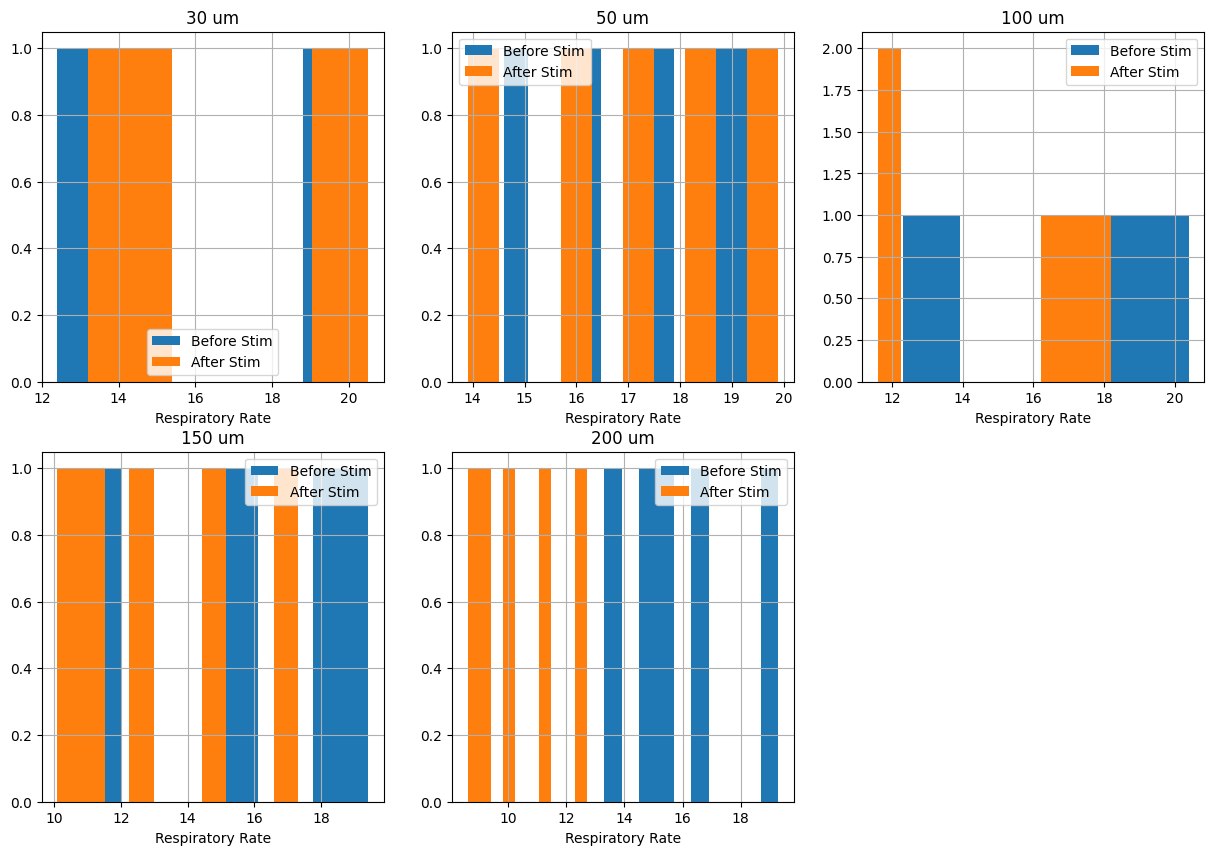

In [ ]:
# Before and after stim histograms

plt.figure(figsize = (15,10))
plt.subplot(231)    # plots histogram of before and after for each device onto the same graph
clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '30 um'].hist()
clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '30 um'].hist()
plt.xlabel('Respiratory Rate')
plt.title('30 um')
plt.legend(['Before Stim', 'After Stim'])
plt.subplot(232)
clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '50 um'].hist()
clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '50 um'].hist()
plt.xlabel('Respiratory Rate')
plt.title('50 um')
plt.legend(['Before Stim', 'After Stim'])
plt.subplot(233)
clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '100 um'].hist()
clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '100 um'].hist()
plt.xlabel('Respiratory Rate')
plt.title('100 um')
plt.legend(['Before Stim', 'After Stim'])
plt.subplot(234)
clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '150 um'].hist()
clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '150 um'].hist()
plt.xlabel('Respiratory Rate')
plt.title('150 um')
plt.legend(['Before Stim', 'After Stim'])
plt.subplot(235)
clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '200 um'].hist()
clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '200 um'].hist()
plt.xlabel('Respiratory Rate')
plt.title('200 um')
plt.legend(['Before Stim', 'After Stim'])

In [ ]:
# Samples are not independent so we cannot use ANOVA, instead a paired t-test is appropriate. The data is related and therefore we should use a related t-test.

print('30 um results:',stats.ttest_rel(clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '30 um'],
              clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '30 um'])) # comparing before and after with related t-test

print('50 um results:',stats.ttest_rel(clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '50 um'],
              clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '50 um']))

print('100 um results:',stats.ttest_rel(clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '100 um'],
              clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '100 um']))

print('150 um results:',stats.ttest_rel(clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '150 um'],
              clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '150 um']))

print('200 um results:',stats.ttest_rel(clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '200 um'],
              clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '200 um']))

30 um results: TtestResult(statistic=np.float64(-1.3061378684993596), pvalue=np.float64(0.2615508441830743), df=np.int64(4))
50 um results: TtestResult(statistic=np.float64(0.7112867591590214), pvalue=np.float64(0.5161869943521876), df=np.int64(4))
100 um results: TtestResult(statistic=np.float64(3.6539011176389904), pvalue=np.float64(0.02169665490060973), df=np.int64(4))
150 um results: TtestResult(statistic=np.float64(5.221123695675253), pvalue=np.float64(0.0064225312413258295), df=np.int64(4))
200 um results: TtestResult(statistic=np.float64(17.477034110840293), pvalue=np.float64(6.29303863146967e-05), df=np.int64(4))


In [237]:
# For normality given small sample size we must use Wilcoxon test (data is paired, if not paired should use Mann-Whitney)

print('30 um results:',stats.wilcoxon(clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '30 um'],
              clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '30 um']))

print('50 um results:',stats.wilcoxon(clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '50 um'],
              clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '50 um']))

print('100 um results:',stats.wilcoxon(clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '100 um'],
              clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '100 um']))

print('150 um results:',stats.wilcoxon(clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '150 um'],
              clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '150 um']))

print('200 um results:',stats.wilcoxon(clinical['RR Before Stim (breaths/min)'][clinical['Device Type'] == '200 um'],
              clinical['RR After Stim (breaths/min)'][clinical['Device Type'] == '200 um']))

30 um results: WilcoxonResult(statistic=np.float64(4.0), pvalue=np.float64(0.4375))
50 um results: WilcoxonResult(statistic=np.float64(3.0), pvalue=np.float64(0.4652088184521418))
100 um results: WilcoxonResult(statistic=np.float64(0.0), pvalue=np.float64(0.0625))
150 um results: WilcoxonResult(statistic=np.float64(0.0), pvalue=np.float64(0.0625))
200 um results: WilcoxonResult(statistic=np.float64(0.0), pvalue=np.float64(0.0625))


C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_wilcoxon.py:199: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


Notice the Wilcoxon test a) needs more samples, and b) shows significance for the same three parameters as before.

The results of these tests demonstrate that the 100, 150, and 200 um devices all produced statistically significant decreases in the respiratory rate of patients after stimulation. 

Some key aspects that could be improved on are controls, increased sample size, and measurement of more variables to further aid in choosing a single best device type.